In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
def evaluate_random_forest(dataset_name, file_path):
    # Load dataset
    df = pd.read_csv(file_path)
    print(f"\n📂 Evaluating dataset: {dataset_name}")
    print("Shape:", df.shape)
    
    # Split features and target
    X = df.drop(columns=['Crop_Yield'])
    y = df['Crop_Yield']

    # Split into train-test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    # Train Random Forest
    rf = RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train, y_train)

    # Predictions
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    # Metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)

    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)

    # Store results
    results = {
        "Dataset": dataset_name,
        "Train_MAE": train_mae,
        "Train_RMSE": train_rmse,
        "Train_R2": train_r2,
        "Test_MAE": test_mae,
        "Test_RMSE": test_rmse,
        "Test_R2": test_r2
    }

    # Plot Actual vs Predicted
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=y_test, y=y_test_pred, color='seagreen')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f"Random Forest - Actual vs Predicted ({dataset_name})")
    plt.xlabel("Actual Crop Yield")
    plt.ylabel("Predicted Crop Yield")
    plt.tight_layout()
    plt.show()

    return results



📂 Evaluating dataset: LOO Encoding
Shape: (25443, 11)


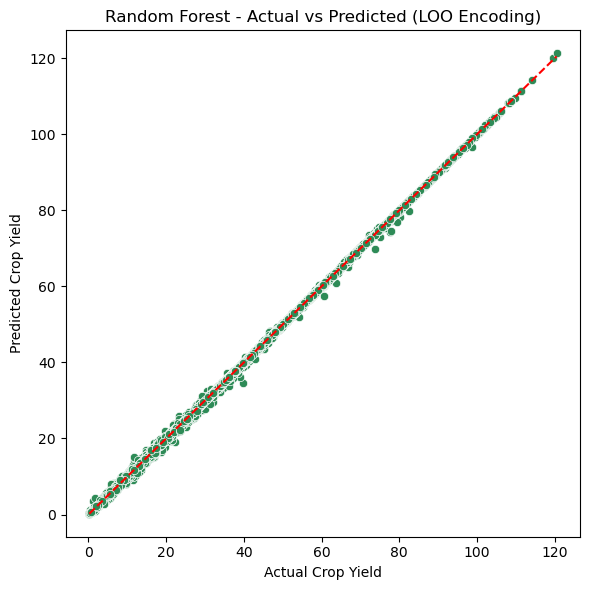


📂 Evaluating dataset: OHE Encoding
Shape: (25443, 22)


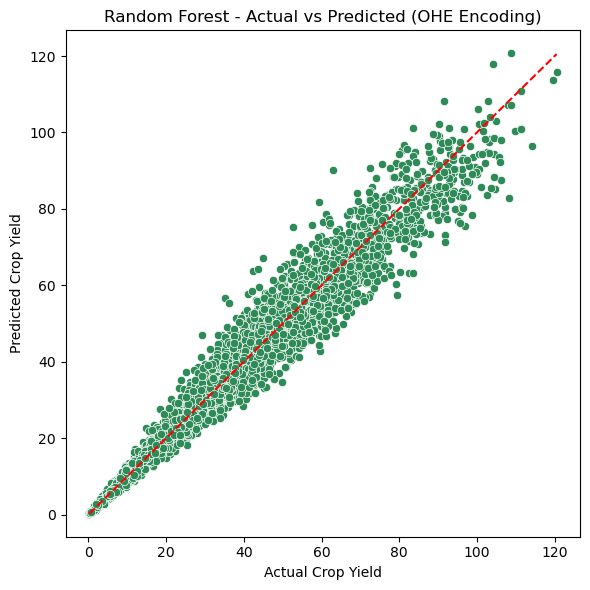

,Dataset,Train_MAE,Train_RMSE,Train_R2,Test_MAE,Test_RMSE,Test_R2
0,LOO Encoding,0.062508,0.158314,0.99995,0.158537,0.368883,0.999731
1,OHE Encoding,1.235669,1.795052,0.99353,3.364219,4.772987,0.954941


In [4]:
# Run evaluation on both datasets
results_loo = evaluate_random_forest("LOO Encoding", "looencoding.csv")
results_ohe = evaluate_random_forest("OHE Encoding", "onehotencoding.csv")

# Combine results for easy comparison
comparison_df = pd.DataFrame([results_loo, results_ohe])
comparison_df = comparison_df.round(6)
display(comparison_df)

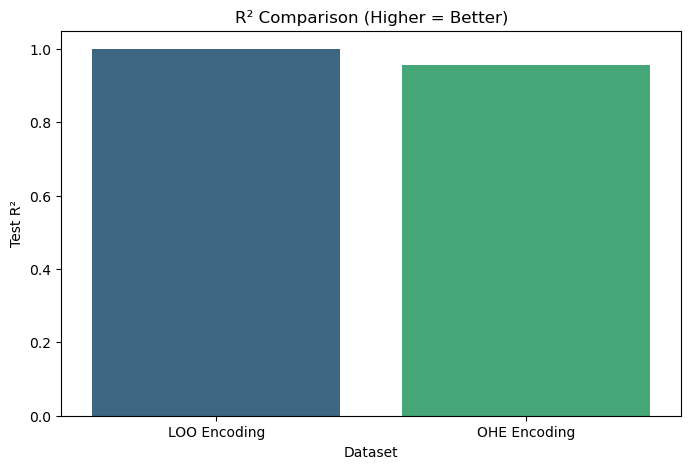

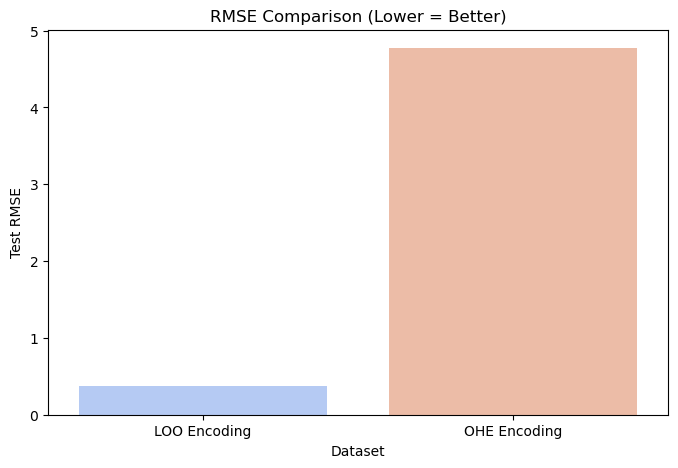

In [5]:
plt.figure(figsize=(8,5))
sns.barplot(x="Dataset", y="Test_R2", data=comparison_df, palette="viridis")
plt.title("R² Comparison (Higher = Better)")
plt.ylabel("Test R²")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="Dataset", y="Test_RMSE", data=comparison_df, palette="coolwarm")
plt.title("RMSE Comparison (Lower = Better)")
plt.ylabel("Test RMSE")
plt.show()

# WE FIND THAT LOO WORKS BEST WITH RANDOM FOREST , SO WE FURTHER CONTINUE WITH IT BY IMPLEMENTING HYPERPARAMETER TUNING AS IT DOES NOT REQUIRE SCALING BECAUSE IT IS A TREE BASED MODEL